In [22]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

DATA_PATH = "../../data/processed/kinematic_equation_cleaned_dataset.csv"

if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Feature-engineered dataset not found at: {DATA_PATH}")

In [23]:
df = pd.read_csv(DATA_PATH)
print(f"Loaded dataset: {df.shape[0]} rows × {df.shape[1]} columns")
df.head()

Loaded dataset: 3000 rows × 7 columns


,Acceleration_ms2,Time_s,Displacement_m,a_times_t2,log_acceleration,log_time,log_displacement
0,7.803532,6.759760,178.288670,356.577340,2.054576,1.910987,5.183404
1,19.038929,7.987146,607.289463,1214.578927,2.946486,2.077833,6.409006
2,14.773882,2.579632,49.156415,98.312831,2.692861,0.947647,3.895007
3,12.173840,6.286254,240.536730,481.073460,2.499289,1.838365,5.482873
4,3.542363,5.760285,58.769379,117.538759,1.264794,1.750987,4.073621


In [24]:
features = ["Acceleration_ms2", "Time_s", "a_times_t2"]
target = "Displacement_m"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

Train set: (2400, 3), Test set: (600, 3)


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained.")
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(features, model.coef_)))

✅ Model trained.
Intercept: 5.684341886080802e-14
Coefficients: {'Acceleration_ms2': 1.7722164267361872e-14, 'Time_s': 2.425837308805967e-14, 'a_times_t2': 0.49999999999999883}


In [26]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📈 R² Score: {r2:.4f}")
print(f"📉 RMSE: {rmse:.4f}")

📈 R² Score: 1.0000
📉 RMSE: 0.0000


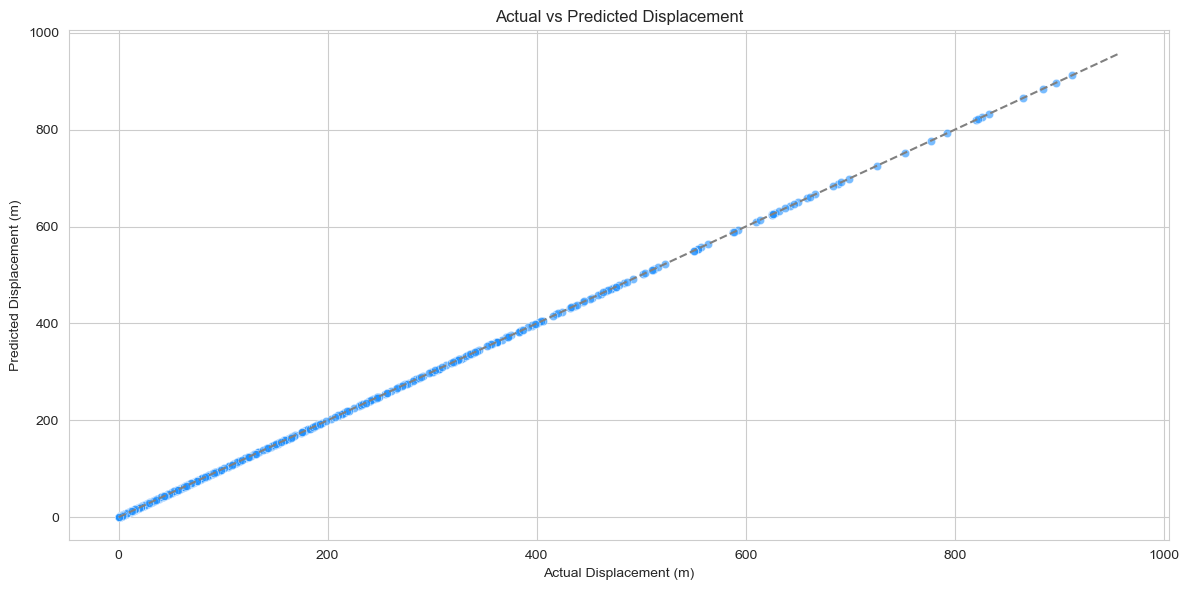

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="dodgerblue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.xlabel("Actual Displacement (m)")
plt.ylabel("Predicted Displacement (m)")
plt.title("Actual vs Predicted Displacement")
plt.tight_layout()
plt.show()

In [28]:
import joblib

os.makedirs("../../models/", exist_ok=True)
joblib.dump(model, "../../models/kinematic_equation_regression_model.pkl")
print("Model saved to models/kinematic_equation_regression_model.pkl")

Model saved to models/kinematic_equation_regression_model.pkl
